<a href="https://colab.research.google.com/github/enriquemx1/4GEEKS_CLASSES/blob/main/Proyecto_Final_Rice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Rice (Cammeo and Osmancik) [Dataset]. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5MW4Z.

In [3]:
!pip install ucimlrepo


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo

In [14]:
# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

# metadata
print(rice_cammeo_and_osmancik.metadata)

# variable information
print(rice_cammeo_and_osmancik.variables)


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'ID': 276, 'type': 'NATIVE', 'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'venue': 'International Journal of Intel

In [15]:
df_raw = pd.concat([X, y], axis=1)
df_raw.columns = rice_cammeo_and_osmancik.variables
df_raw.info()
df_raw.sample(10,random_state=2025)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                                           --------------  -----  
 0   (Area, Feature, Integer, None, Returns the number of pixels within the boundaries of the rice grain, px, no)                                                     3810 non-null   int64  
 1   (Perimeter, Feature, Continuous, None, Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain, px, no)  3810 non-null   float64
 2   (Major_Axis_Length, Feature, Continuous, None, The longest line that can be drawn on the rice grain, i.e. the main axis distance,

(Area, Feature, Integer, None, Returns the number of pixels within the boundaries of the rice grain, px, no)  \
252                                               15830                                                              
418                                               16519                                                              
1689                                              10267                                                              
493                                               14557                                                              
3321                                              11553                                                              
3787                                               9884                                                              
1116                                              14254                                                              
946                                               15035                                                              
3242                                              12361                                                              
0                                                 15231                                                              

      (Perimeter, Feature, Continuous, None, Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain, px, no)  \
252                                          520.510010                                                                                                                 
418                                          533.218018                                                                                                                 
1689                                         424.949005                                                                                                                 
493                                          492.412994                                                                                                                 
3321                                         433.777008                                                                                                                 
3787                                         389.294006                                                                                                                 
1116                                         491.260986                                                                                                                 
946                                          506.152008                                                                                                                 
3242                                         443.819000                                                                                                                 
0                                            525.578979                                                                                                                 

      (Major_Axis_Length, Feature, Continuous, None, The longest line that can be drawn on the rice grain, i.e. the main axis distance, gives, None, no)  \
252                                          219.447617                                                                                                    
418                                          224.202270                                                                                                    
1689                                         182.409119                                                                                                    
493                                          205.106644                                                                                                    
3321                                         183.221374            

In [16]:
###########################
# Análisis Exploratorio de Datos (EDA)
###########################

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df_raw.describe())




Estadísticas descriptivas:
       (Area, Feature, Integer, None, Returns the number of pixels within the boundaries of the rice grain, px, no)  \
count                                        3810.000000                                                              
mean                                        12667.727559                                                              
std                                          1732.367706                                                              
min                                          7551.000000                                                              
25%                                         11370.500000                                                              
50%                                         12421.500000                                                              
75%                                         13950.000000                                                              
max                 

In [18]:
# Verificar valores nulos
print("\nValores nulos:")
print(df_raw.isnull().sum())






Valores nulos:
(Area, Feature, Integer, None, Returns the number of pixels within the boundaries of the rice grain, px, no)                                                       0
(Perimeter, Feature, Continuous, None, Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain, px, no)    0
(Major_Axis_Length, Feature, Continuous, None, The longest line that can be drawn on the rice grain, i.e. the main axis distance, gives, None, no)                 0
(Minor_Axis_Length, Feature, Continuous, None, The shortest line that can be drawn on the rice grain, i.e. the small axis distance, gives, None, no)               0
(Eccentricity, Feature, Continuous, None, It measures how round the ellipse, which has the same moments as the rice grain, is, None, no)                           0
(Convex_Area, Feature, Integer, None, Returns the pixel count of the smallest convex shell of the region formed by the rice grain, None, no)                   

<ipython-input-19-129ead2d4e26>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_raw.columns[-1], data=df_raw, palette="viridis")


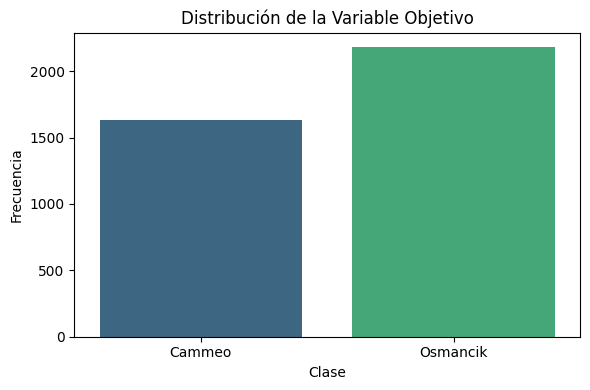

In [19]:
# Distribución de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(x=df_raw.columns[-1], data=df_raw, palette="viridis")
plt.title("Distribución de la Variable Objetivo")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

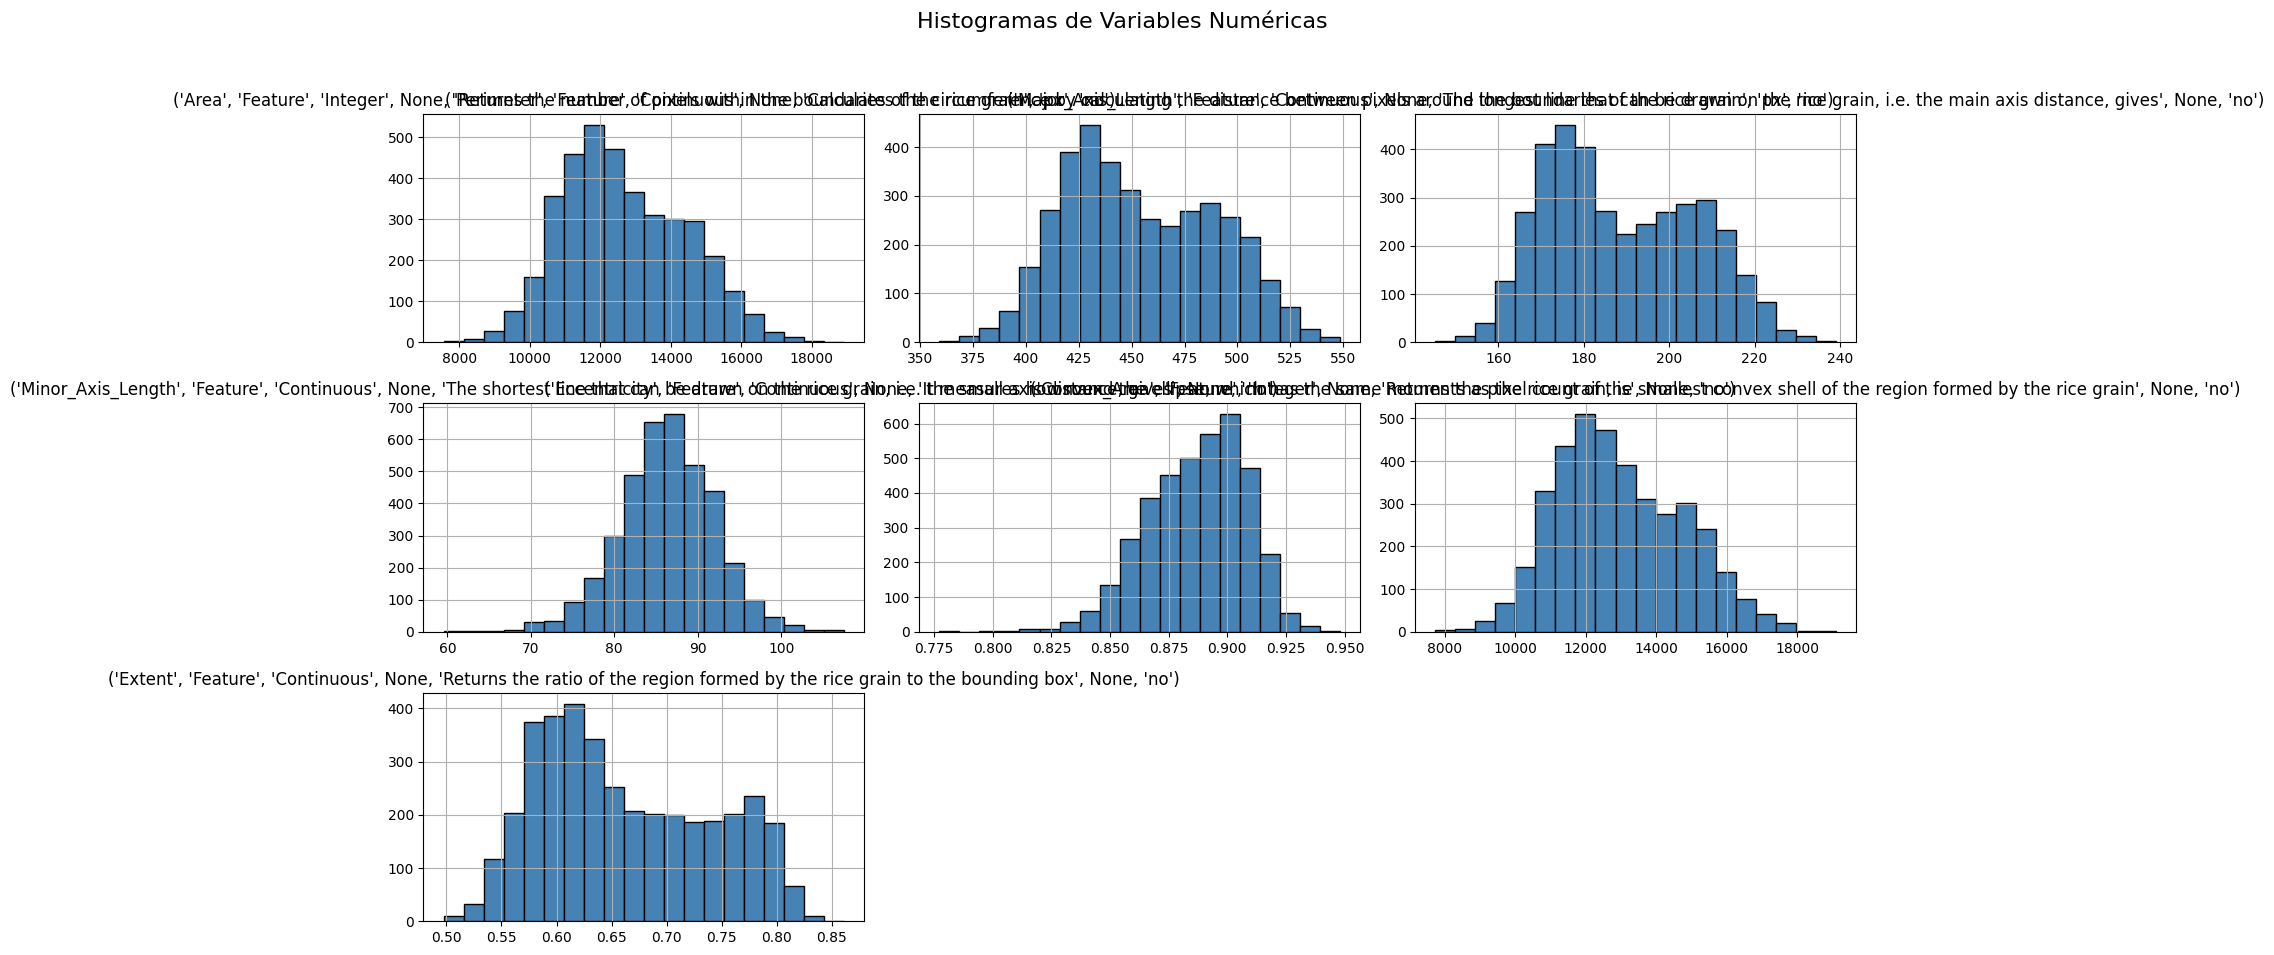

In [28]:
numeric_cols.hist(bins=20, figsize=(15,10), color='steelblue', edgecolor='black')
plt.suptitle("Histogramas de Variables Numéricas", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<ipython-input-30-ca4f32eedf0e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y.iloc[:, 0], y=numeric_cols[col], palette="viridis")  # Assuming 'y' is a DataFrame and you want the first column


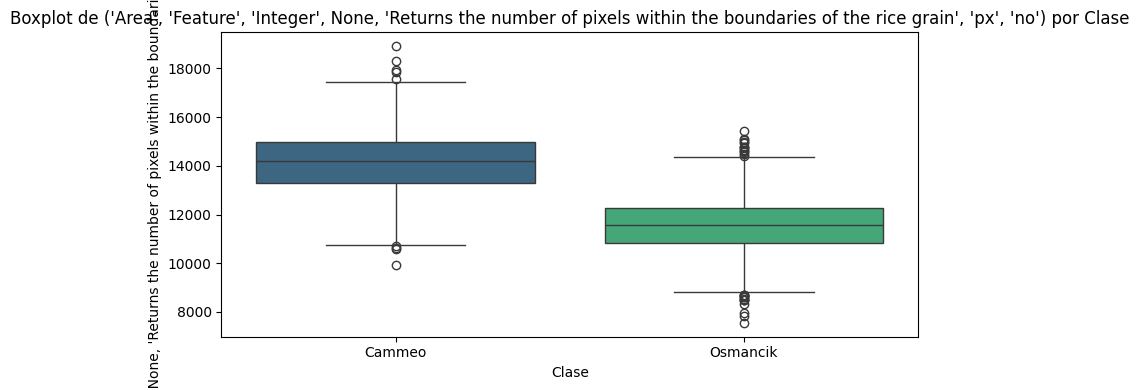

<ipython-input-30-ca4f32eedf0e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y.iloc[:, 0], y=numeric_cols[col], palette="viridis")  # Assuming 'y' is a DataFrame and you want the first column


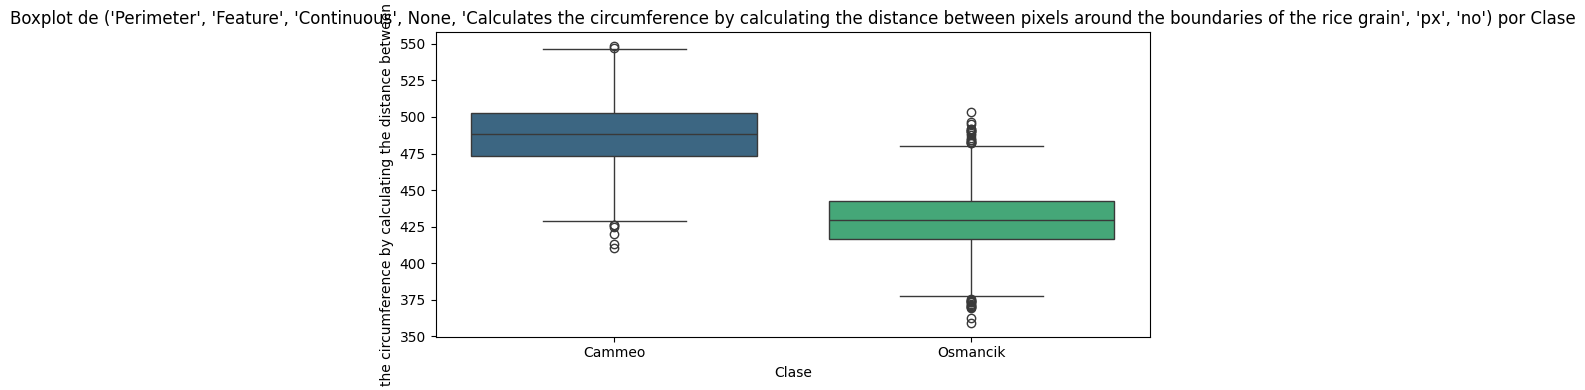

<ipython-input-30-ca4f32eedf0e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y.iloc[:, 0], y=numeric_cols[col], palette="viridis")  # Assuming 'y' is a DataFrame and you want the first column


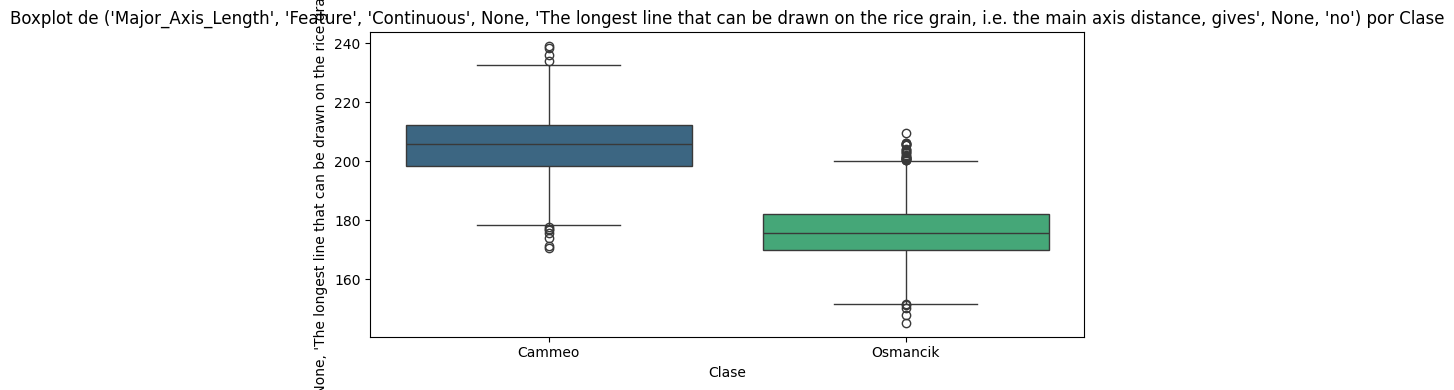

<ipython-input-30-ca4f32eedf0e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y.iloc[:, 0], y=numeric_cols[col], palette="viridis")  # Assuming 'y' is a DataFrame and you want the first column


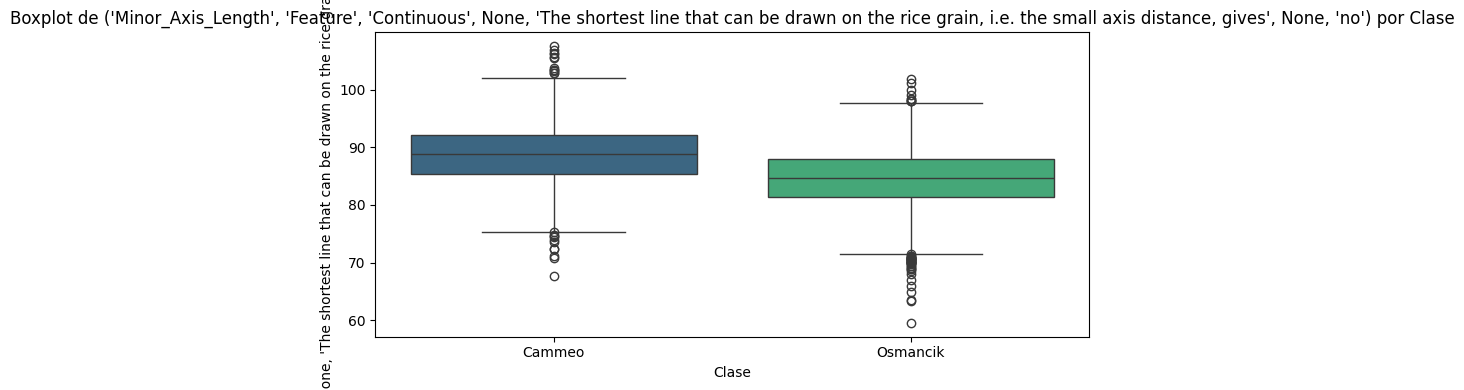

<ipython-input-30-ca4f32eedf0e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y.iloc[:, 0], y=numeric_cols[col], palette="viridis")  # Assuming 'y' is a DataFrame and you want the first column


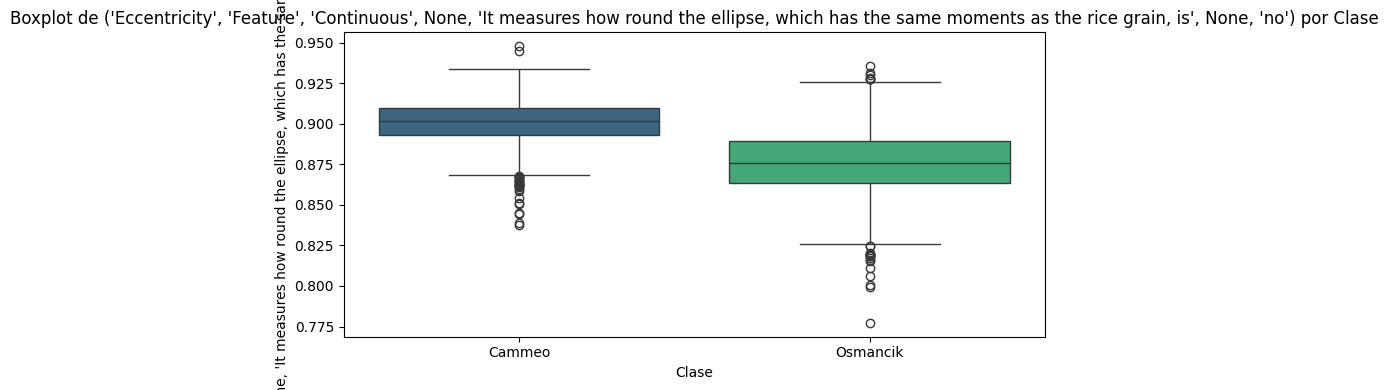

<ipython-input-30-ca4f32eedf0e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y.iloc[:, 0], y=numeric_cols[col], palette="viridis")  # Assuming 'y' is a DataFrame and you want the first column


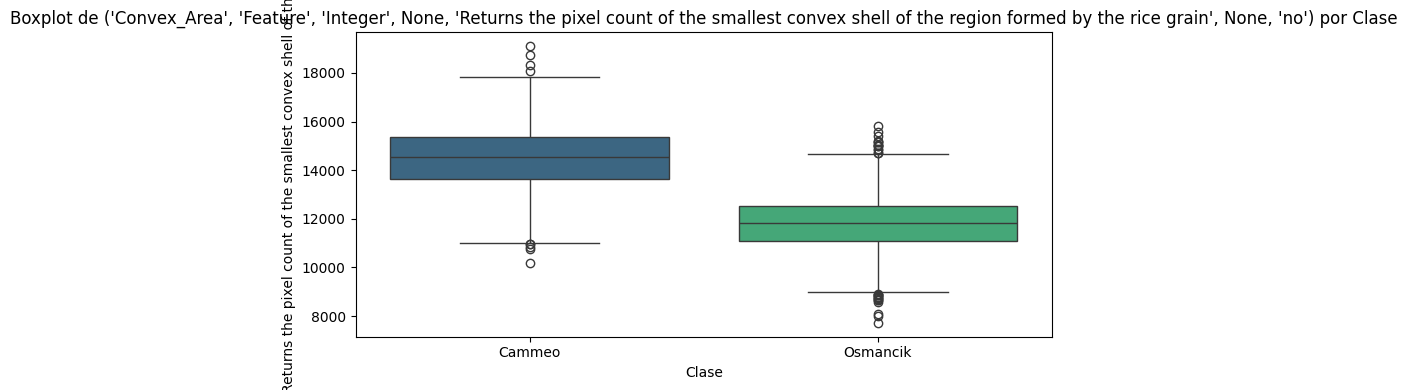

<ipython-input-30-ca4f32eedf0e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y.iloc[:, 0], y=numeric_cols[col], palette="viridis")  # Assuming 'y' is a DataFrame and you want the first column


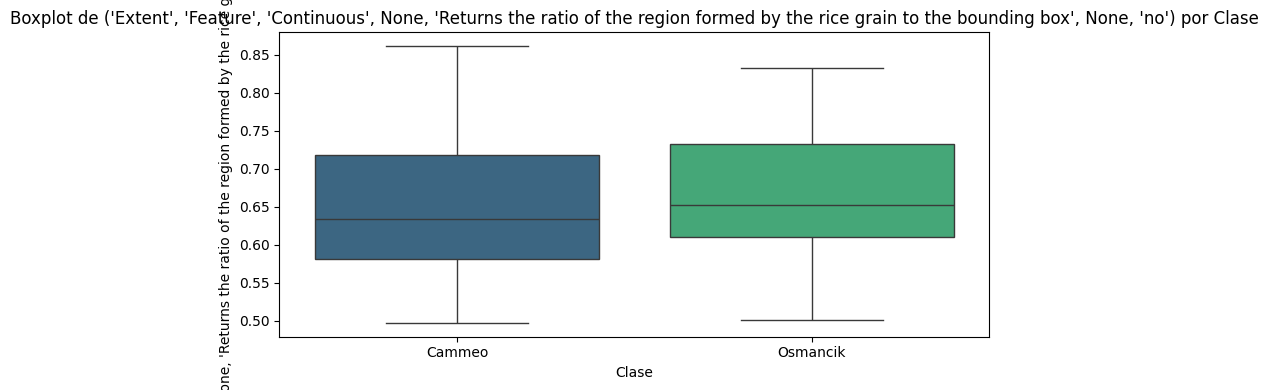

In [30]:
for col in numeric_cols.columns:
    plt.figure(figsize=(8, 4))
    # The target variable 'y' should be a Series or a 1-D array
    sns.boxplot(x=y.iloc[:, 0], y=numeric_cols[col], palette="viridis")  # Assuming 'y' is a DataFrame and you want the first column
    plt.title(f"Boxplot de {col} por Clase")
    plt.xlabel("Clase")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

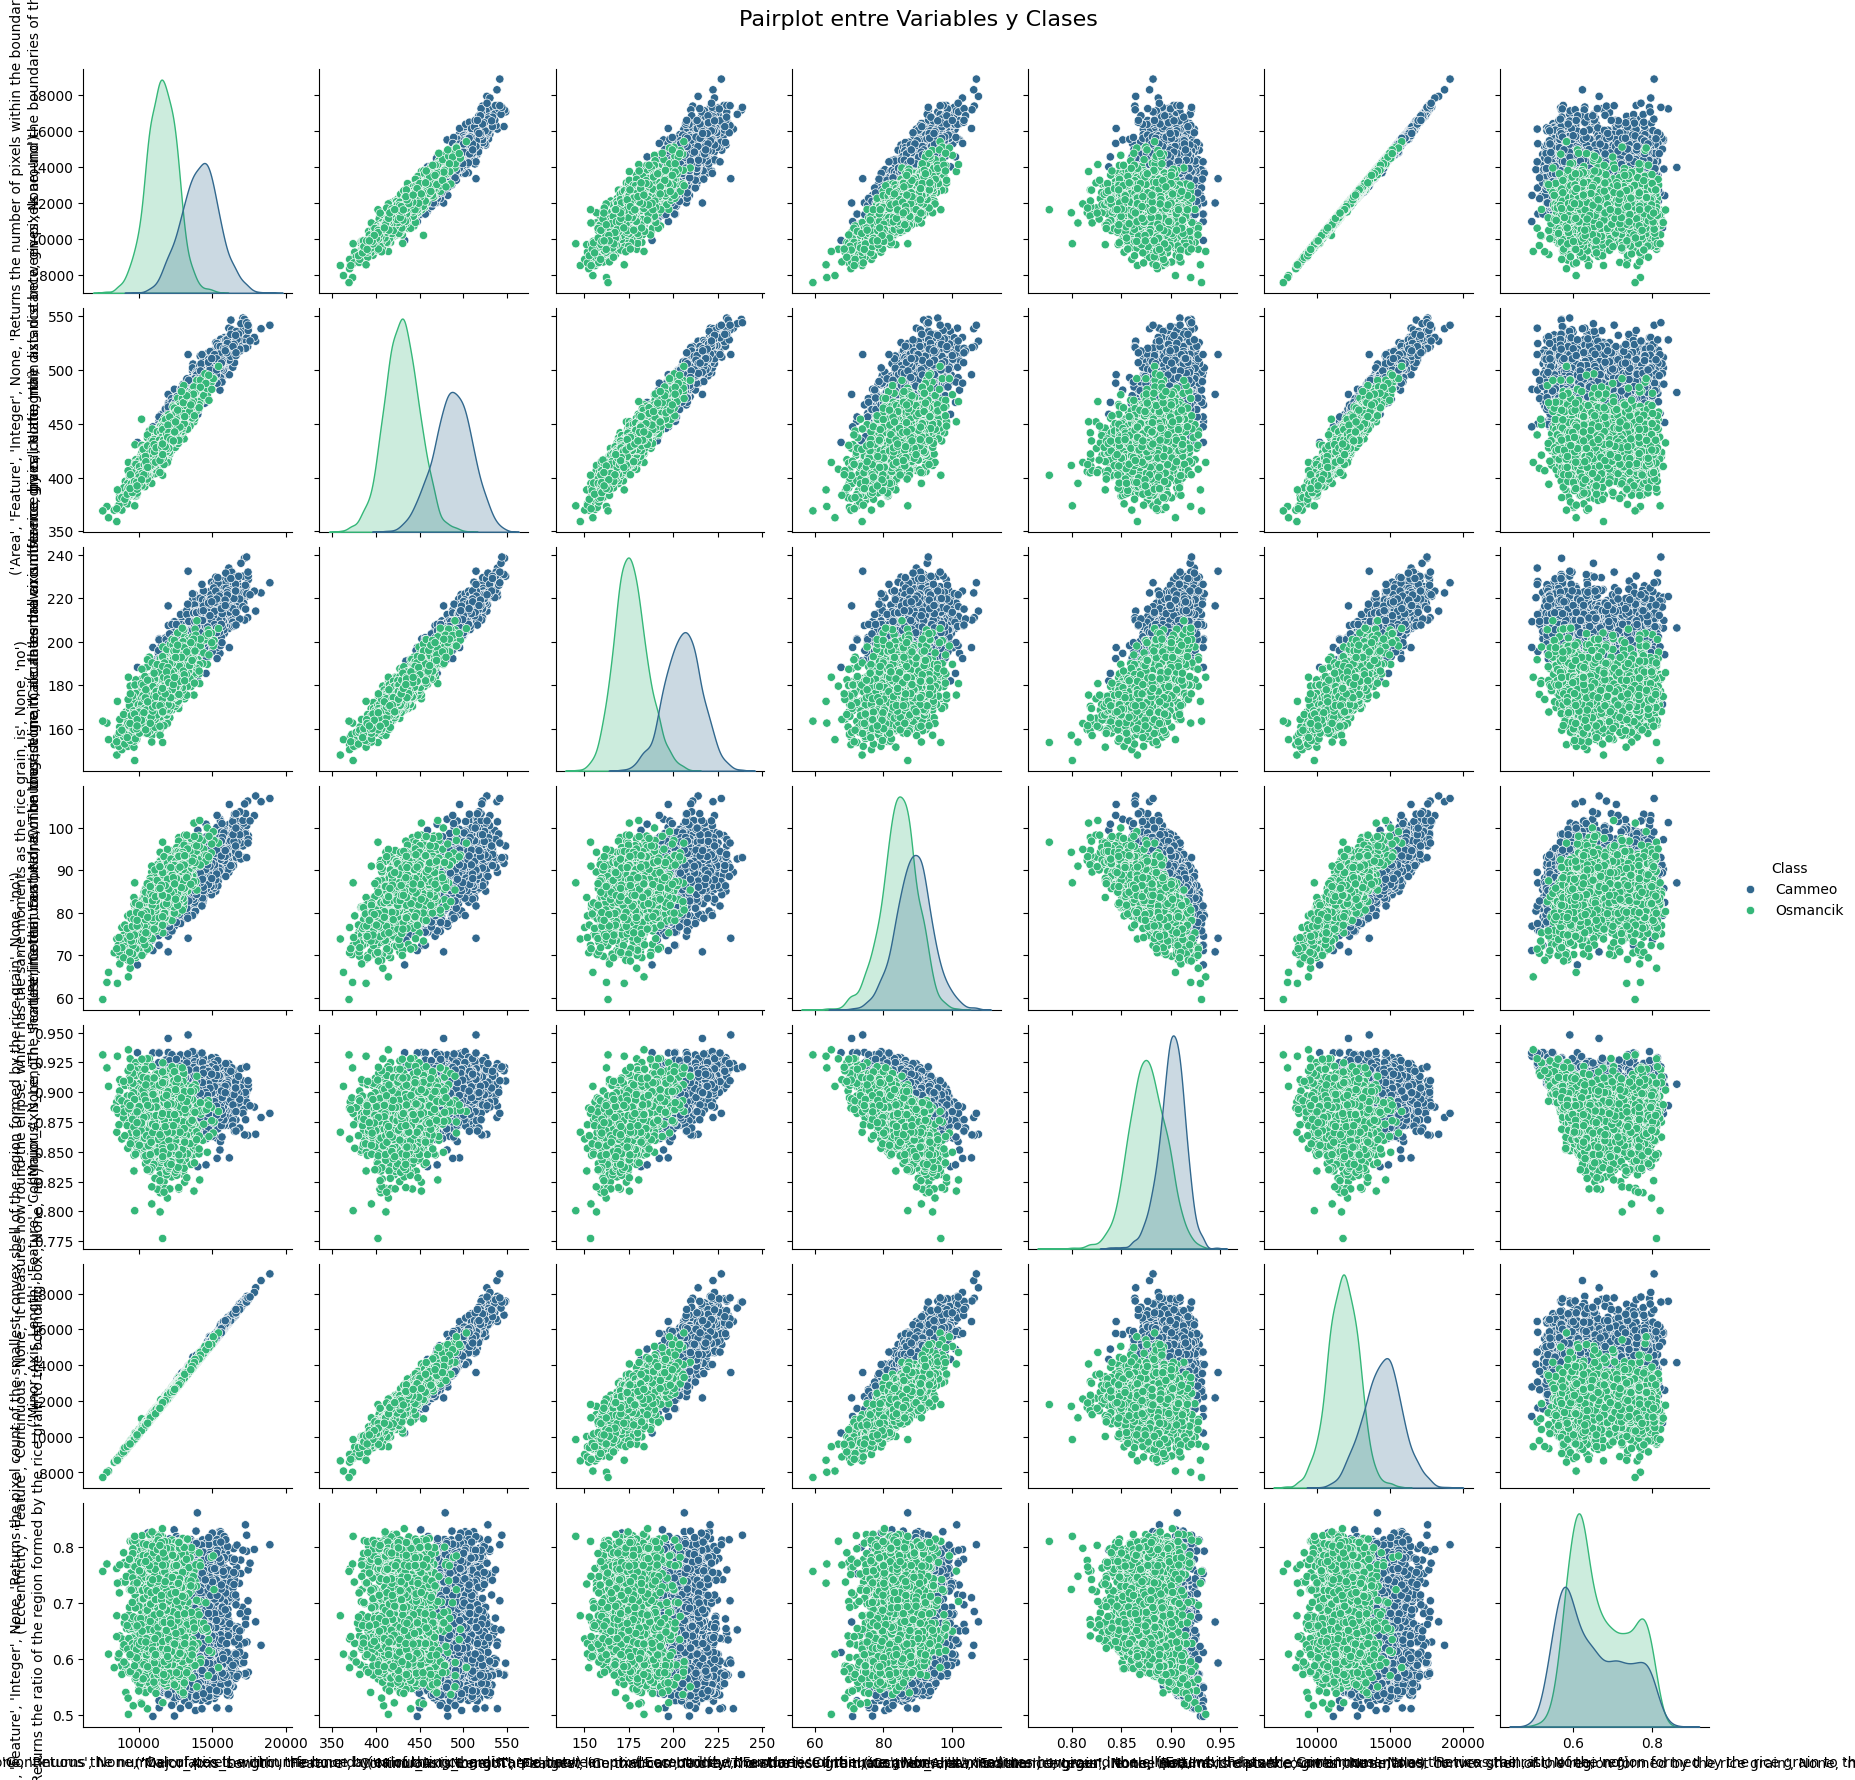

In [32]:
#Pairplot
sns.pairplot(pd.concat([numeric_cols, y], axis=1), hue='Class', palette="viridis", diag_kind="kde") # Change y.name to 'Class'
plt.suptitle("Pairplot entre Variables y Clases", y=1.02, fontsize=16)
plt.show()

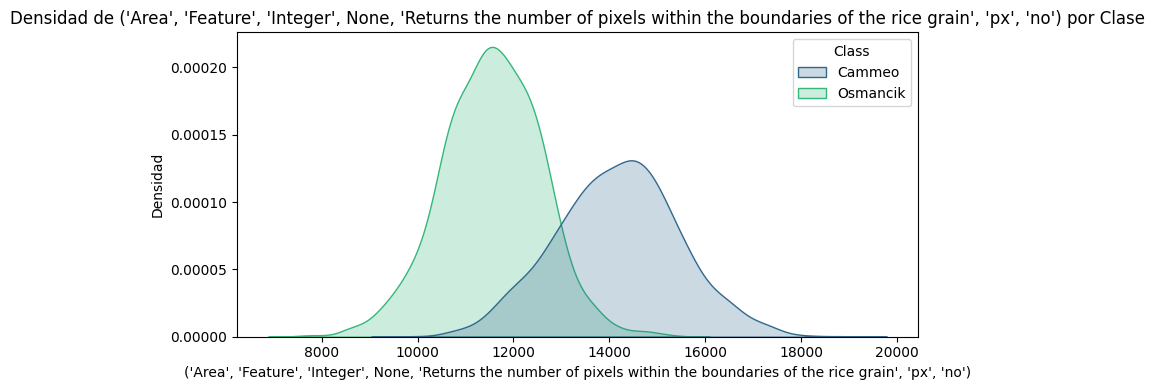

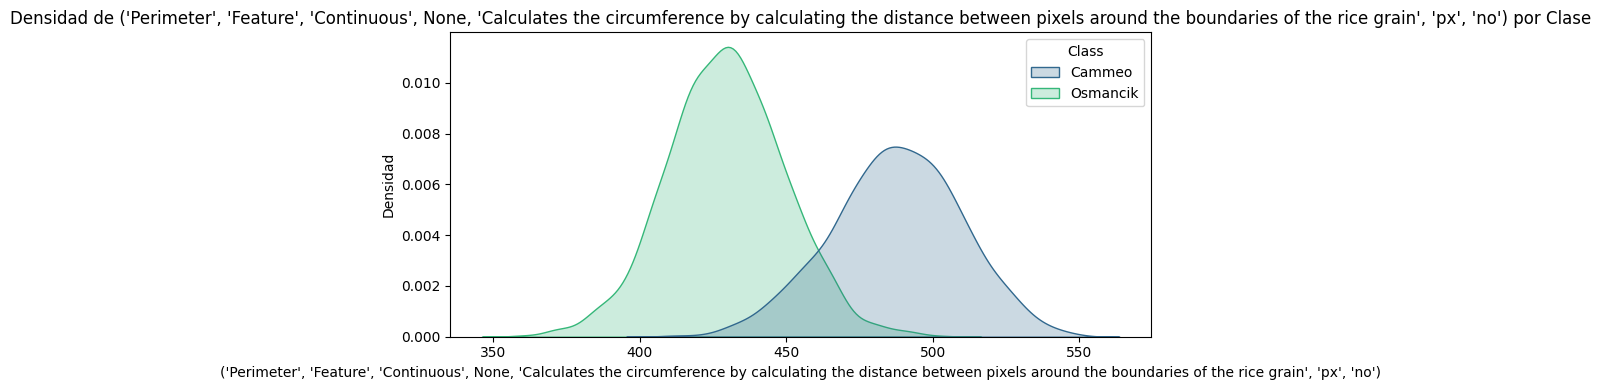

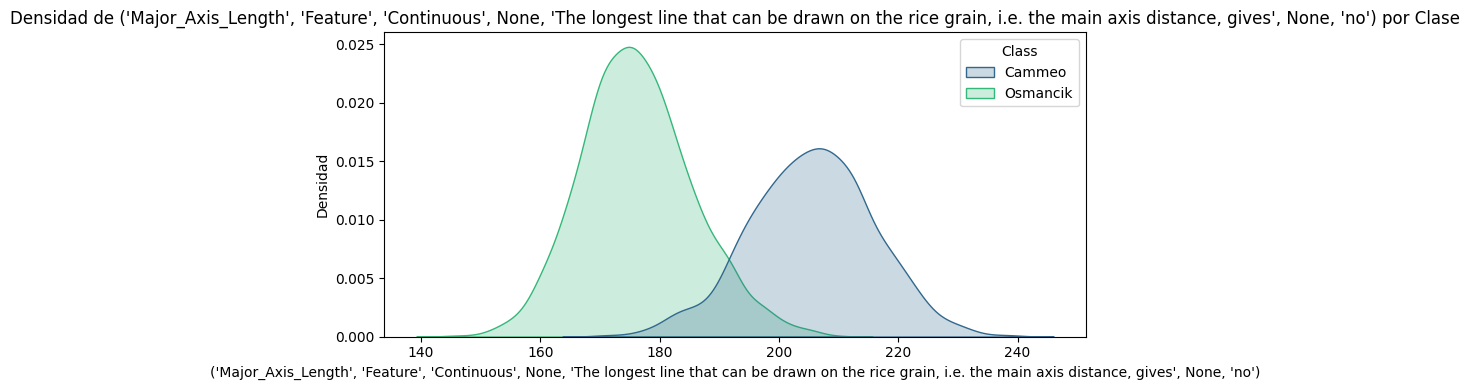

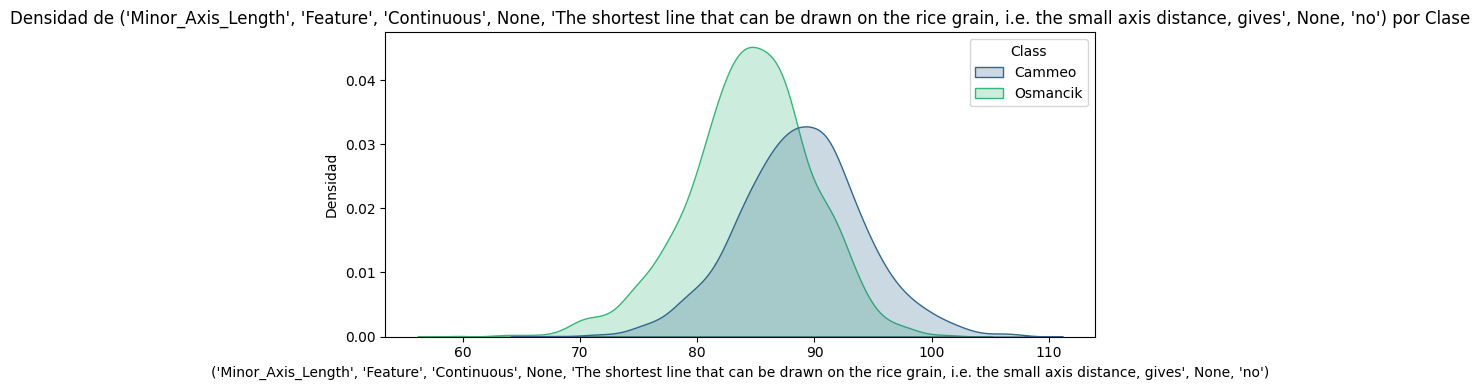

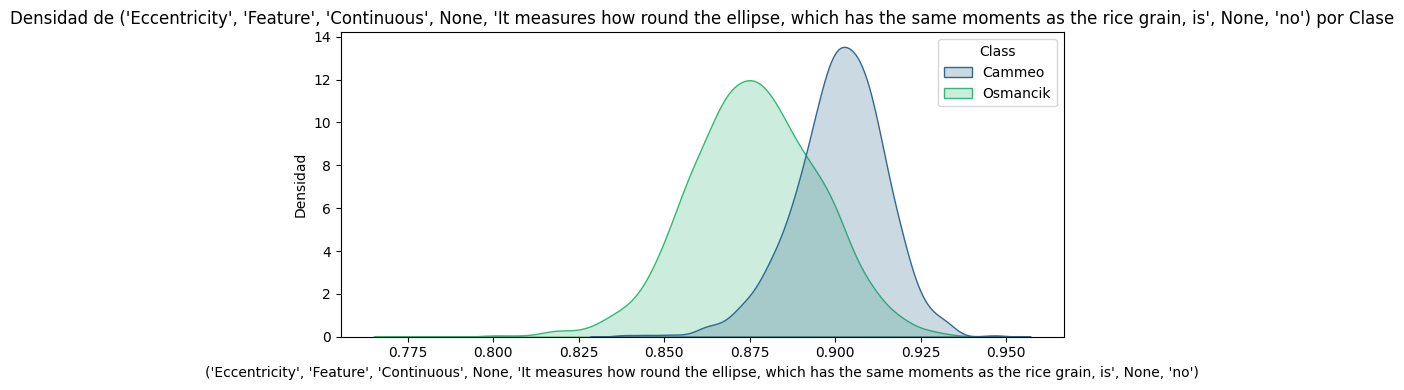

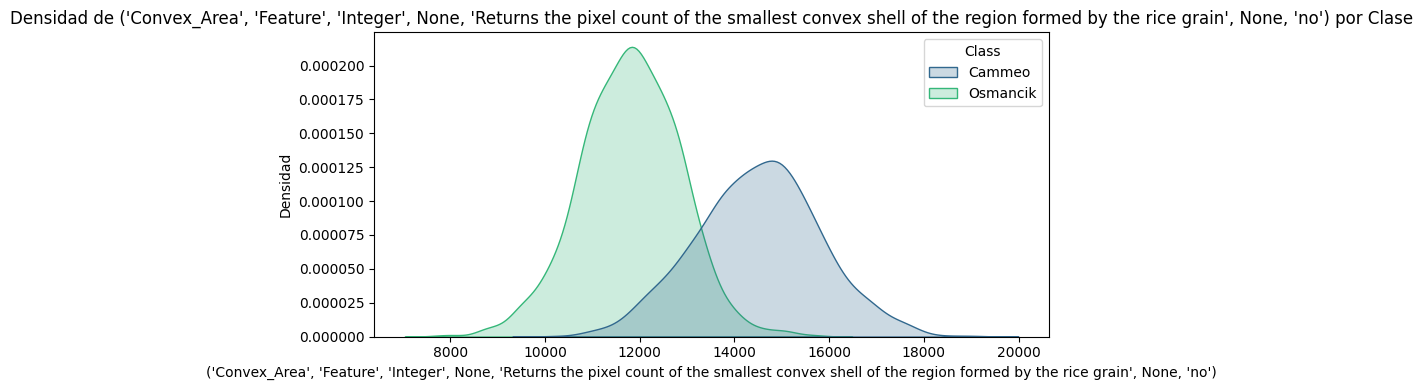

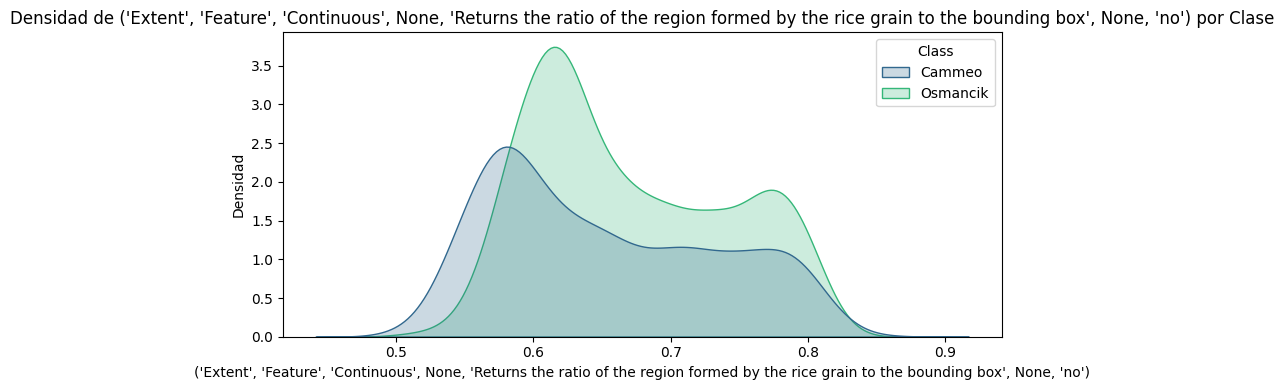

In [33]:
# Gráficos de densided (KDE)
for col in numeric_cols.columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(x=numeric_cols[col], hue=y.iloc[:, 0], fill=True, palette="viridis")
    plt.title(f"Densidad de {col} por Clase")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.tight_layout()
    plt.show()

<ipython-input-20-de48e0948bb3>:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


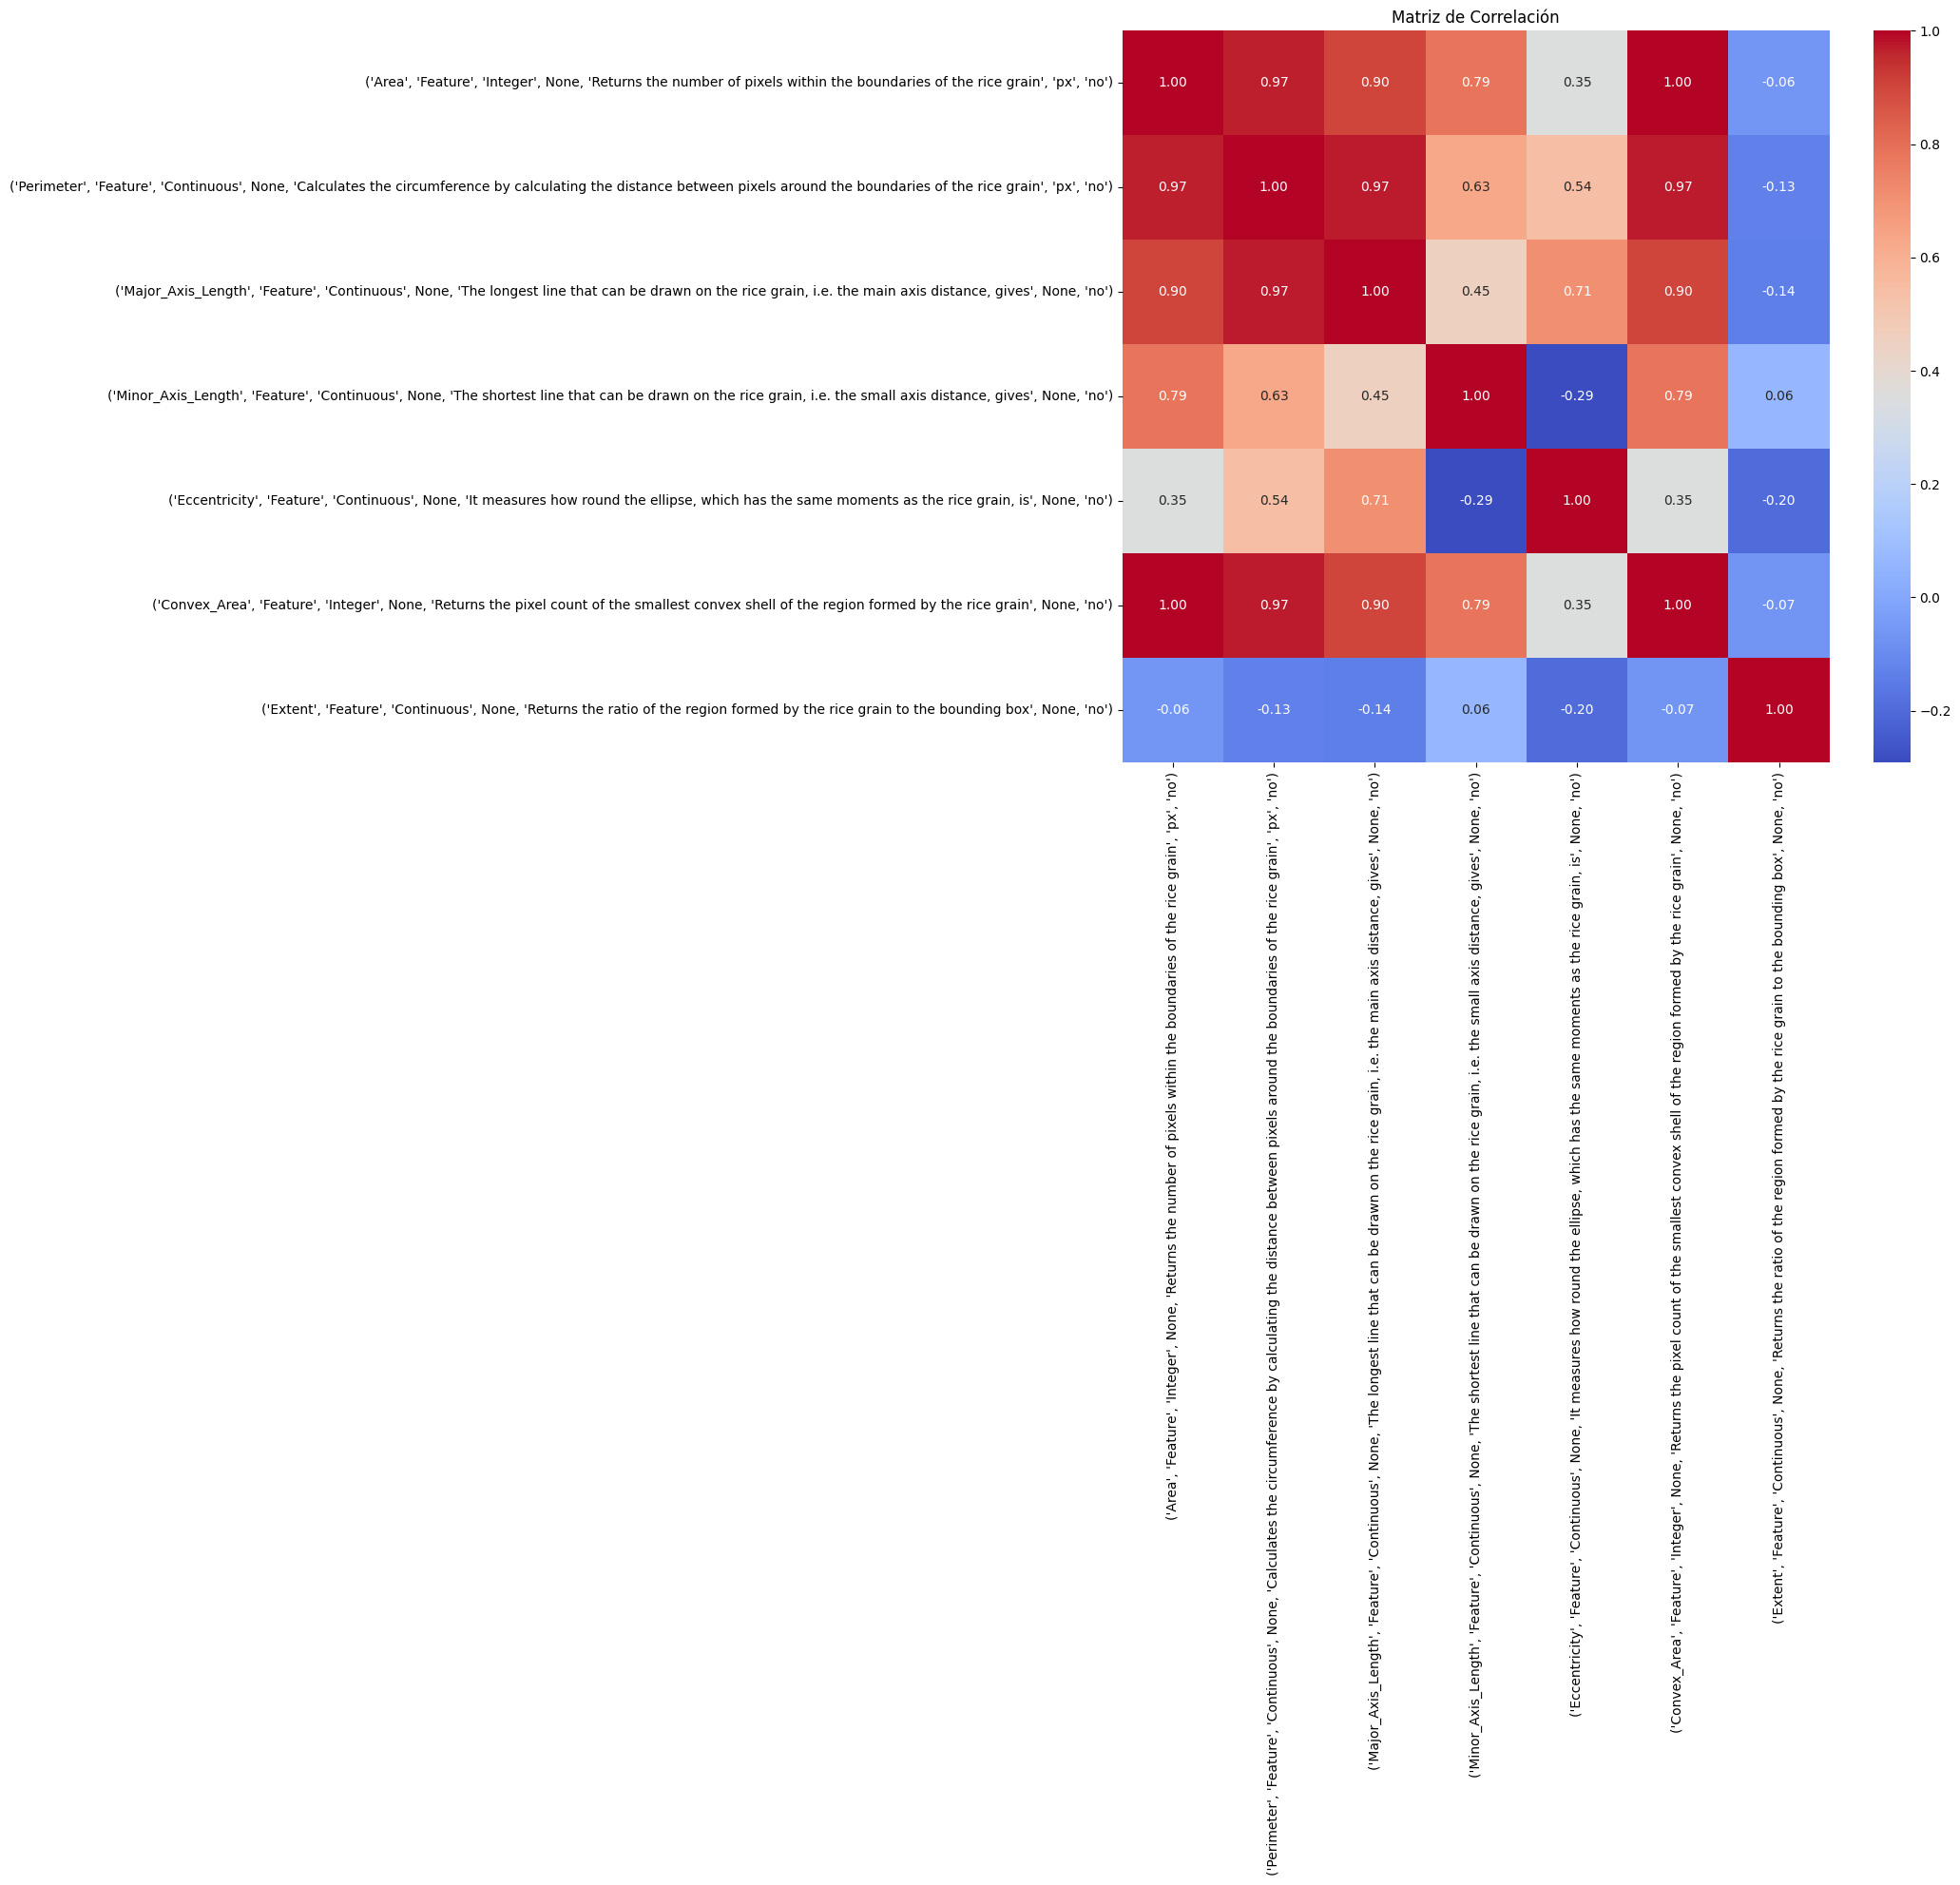

In [20]:
# Matriz de correlación solo para columnas numéricas
numeric_cols = df_raw.select_dtypes(include=[np.number])  # Seleccionar columnas numéricas

if numeric_cols.shape[1] > 0:
    # Calcular la matriz de correlación
    plt.figure(figsize=(12,10))
    corr = numeric_cols.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title("Matriz de Correlación")
    plt.tight_layout()
    plt.show()
else:
    print("No hay columnas numéricas disponibles para calcular la matriz de correlación.")



In [21]:
###########################
# Segmentación y Entrenamiento del Modelo
###########################

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Escalado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=2025,
    stratify=y
)

# Entrenar el modelo de Regresión Logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [22]:
###########################
# Evaluación del Modelo
###########################

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Métricas de evaluación
print("\nEvaluación del Modelo:")
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud: {accuracy:.2f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))




Evaluación del Modelo:
Exactitud: 0.93

Matriz de Confusión:
[[300  26]
 [ 27 409]]

Reporte de Clasificación:
              precision    recall  f1-score   support

      Cammeo       0.92      0.92      0.92       326
    Osmancik       0.94      0.94      0.94       436

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



In [23]:
###########################
# Pronóstico y Comparación
###########################

# Pronosticar sobre el conjunto de prueba
example_prediction = modelo.predict(X_test[:5])  # Pronóstico de ejemplo
print("\nPronóstico (Primeros 5 registros):")
print("Real:", y_test[:5].values)
print("Predicción:", example_prediction)




Pronóstico (Primeros 5 registros):
Real: [['Cammeo']
 ['Osmancik']
 ['Cammeo']
 ['Osmancik']
 ['Osmancik']]
Predicción: ['Cammeo' 'Osmancik' 'Cammeo' 'Osmancik' 'Osmancik']


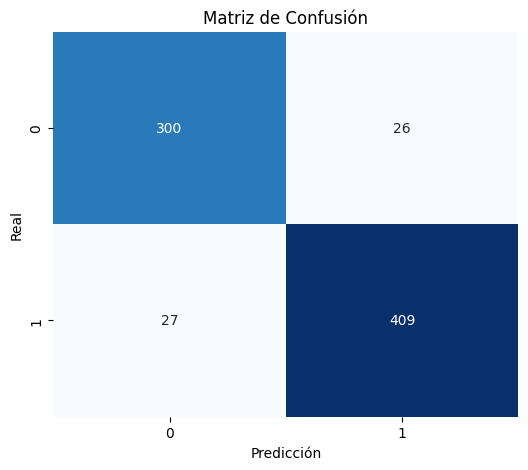

In [24]:
###########################
# Visualización Adicional
###########################

# Visualizar la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()